In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pydicom
import nilearn as nilrn
import nibabel as nib
import warnings
warnings.filterwarnings('ignore')
from pydicom.data import get_testdata_files
%matplotlib inline

# Medical Imaging Terms and Fundamentals

## What is a medical image  - 
A **medical image** is the representation of the internal structure or function of an anatomic region in the form of an array of picture elements called pixels or voxels.

A medical image has 4 major characteristics

1. Pixel Depth - No of bits used to encode the information. Aka BitDepth/Color Depth
2. Photometric Interpretation - Specifies how the pixel data should be interpreted for the correct image display as a monochrome or color image. Aka Channnel Information
3. Metadata - Stored as a header. Describes properties of image eg Spatial dimensions etc
4. Pixel Data - Actual pixel data values


## Concept of Voxel
Most of the medical diagnosis requires the organ/anatomic region to be viewed from angles/dimensions. So we have the images captured in higher dimensions (like 3D). 

A **voxel** is a volume element (volumetric and pixel) representing a value in the three dimensional space, corresponding to a pixel for a given slice thickness

![Voxel](Images\voxel.gif)

## Medical Imaging Modalities

![Modalities](Images/modalities.jpg)

## Medical Imaging Formats

![formats](Images/formats.png)

#### Lets Explore 2 of most popular formats NIFTI and DICOM

## NIFTI (The Neuroimaging Informatics Technology Initiative)

- Header with Volumetric Pixel data
- Supports upto 5 dimensions 
- One of the key capabilities of the format (stored in the header) is an affine mapping between voxel indices (i,j,k) and real world spatial location (x,y,z)
- Volumetric representation (3D)

Lets see NIFTI in action. First we will define 2 variables to load the image and segmentation data

In [39]:
IMG_PATH = "Data/NIFTI/FLAIR.nii.gz"
SEG_PATH = "Data/NIFTI/FLAIR_mask.nii.gz"

As a next step we will use the library `nibabel` to load the NIFTI files

In [40]:
img  = nib.load(IMG_PATH)
type(img)

nibabel.nifti1.Nifti1Image

We can view the shape of the image by using `shape` attribute

In [41]:
img.shape

(288, 288, 22)

As we can see that image is a 3D volume of 228 (x)  x 228 (y)  x 22 (z). Or we can say that its 228 width and 228 height with 22 slices

As mentioned earlier the image also holds the metadata information

In [42]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:9000.000 TE:10'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 288 288  22   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.000000e+00  7.986111e-01  7.986111e-01  6.000001e+00  9.000000e+00
  1.000000e+00  1.000000e+00  5.213653e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.00043226502
quatern_c       : -0.99927855
quatern_d       

Now lets try to plot the data

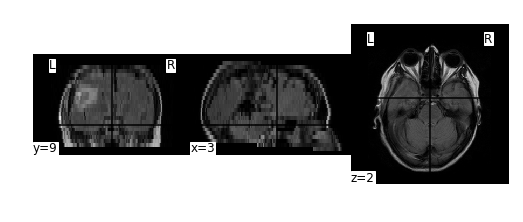

In [43]:
from nilearn import plotting
plotting.plot_img(IMG_PATH,cmap = 'gray')

The above command gave display in 3 views namely axial, sagittal and coronal. Lets understand what this means.

We are trying to analyze a MRI (FLAIR) file and the image gets captured as a 3D volume 

![MRI position](Images/MRI.png)

<video controls src="Images/Anatomicposition.mp4" />

We can also plot the image in other one view. Lets plot the axial view and Sagittal view

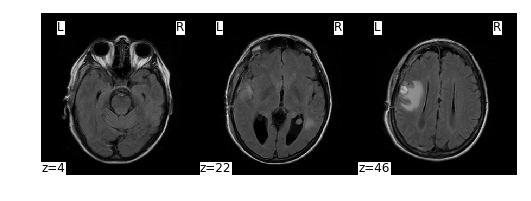

In [44]:
plotting.plot_img(IMG_PATH,cmap = 'gray', display_mode='z',draw_cross=True,cut_coords=3)

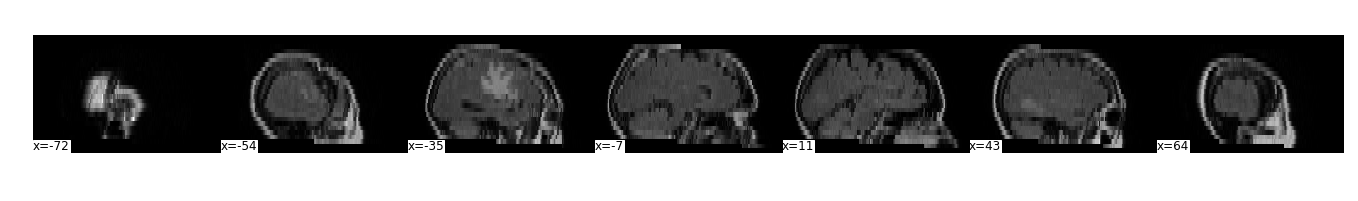

In [45]:
plotting.plot_img(IMG_PATH,cmap = 'gray', display_mode='x')

We can also plot the segmentation mask and see the overlayed ROI

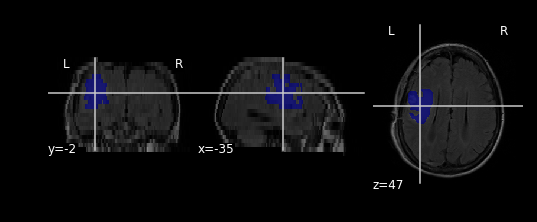

In [19]:
plotting.plot_roi(SEG_PATH,IMG_PATH)

We can get the underlying pixel data from the image by `get_fdata()` function

In [46]:
img_data = img.get_fdata()
img_data.shape

(288, 288, 22)

As we now have a numpy array we can slice and dice the numpy array as per normal methods. For example lets select the 8th Axial slice

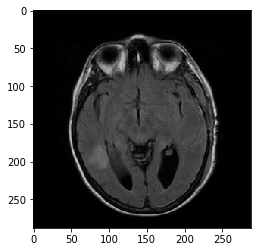

In [47]:
plt.imshow(np.rot90(img_data[:,:,8]),cmap='gray')

Lets now see how we can plot the coronal and sagittal view. Here because we have uneven dimension i have used the `aspect` attribute for better image viewing

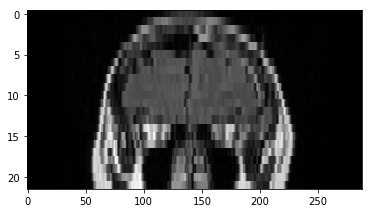

In [221]:
coronal = np.transpose(img_data, [0, 2, 1])
coronal = np.rot90(coronal, 1)
plt.imshow(coronal[:,:,200], cmap='gray',aspect = 7)

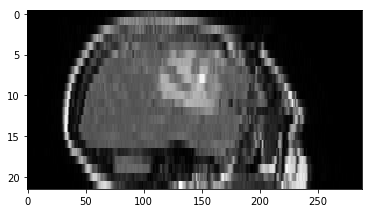

In [222]:
sg = np.transpose(img_data, [1, 2,0])
sg = np.rot90(sg, 1)
plt.imshow(sg[:,:,200], cmap='gray',aspect = 7)

`nilearn` & `nibabel` has also some other helper functions that operate directly on the image and help us do image processing. Lets explore the smoothing function

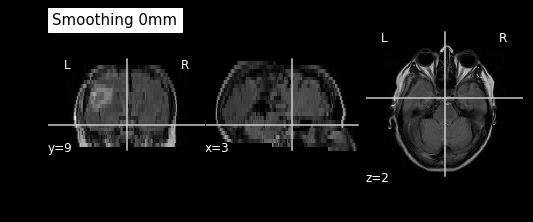

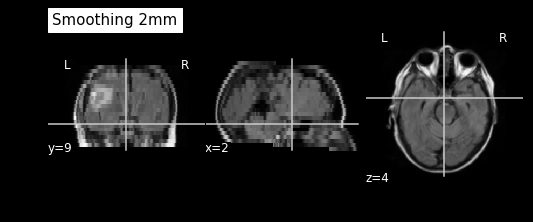

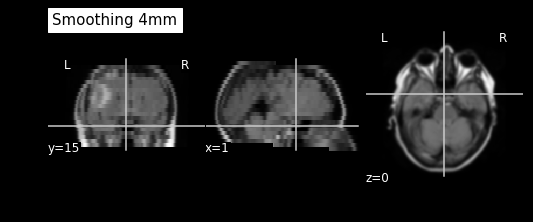

In [73]:
for smoothing in range(0, 6, 2):
    smoothed_img = nilrn.image.smooth_img(IMG_PATH, smoothing)
    plotting.plot_epi(smoothed_img,
                      title="Smoothing %imm" % smoothing, cmap = 'gray')

## DICOM (Digital Imaging and Communications in Medicine)

- Usually we get the files right off a scanner or hospital PACS (picture archiving and communication system)
- Consists of a header and the image data in the same file (*.dcm)
- Usually consists of multiple 2D slices of the anatomical region for patient

Reading and plotting a DICOM file

In [75]:
ds = pydicom.read_file('Data/DICOM/IM-0001-0008.dcm')

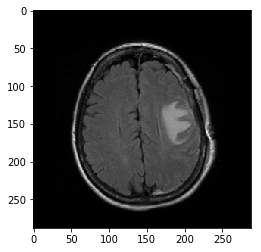

In [76]:
plt.imshow(ds.pixel_array,cmap = 'gray')

A DICOM file contains some header information in addition to the pixel data array information. This is accessible via the Dataset object and is stored as key-value pair

In [4]:
type(ds)

pydicom.dataset.FileDataset

In [30]:
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20040119'
(0008, 0013) Instance Creation Time              TM: '072731'
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.3
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0008, 0020) Study Date                          DA: '20040119'
(0008, 0021) Series Date                         DA: '19970430'
(0008, 0022) Acquisition Date                    DA: '19970430'
(0008, 0023) Content Date                        DA: '19970430'
(0008, 0030) Study Time                          TM: '072730'
(0008, 0031) Series Time                         TM: '112749'
(0008, 0032) Acquisition Time                    TM: '112936'
(0008, 0033) Content Time            

To access a particular value we use dataset object to access the value of the property. For example to access the 'PatientName' information we can use


In [40]:
print('Patient Name is - ' + str(ds.PatientName))
print('Patient ID is - ' + str(ds.PatientID))
print('Patient Sex is - ' + str(ds.PatientSex))

Patient Name is - BRAINIX
Patient ID is - 5Yp0E
Patient Sex is - 0000


The properties can be also set as we normally set a object's property/attribute in Python. Lets change the sex to M 

In [45]:
ds.PatientSex = 'M'
print('Patient Sex is - ' + str(ds.PatientSex))

Patient Sex is - M


The data is accessible via the pixel_array property. This returns a numpy array representing an image pixels.

In [7]:
img_data = ds.pixel_array

In [8]:
img_data.shape

(288, 288)

From the shape of the pixel data we can see that its a 288 x 288 image. Lets now plot the intensities of the image

C:\Users\mohit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


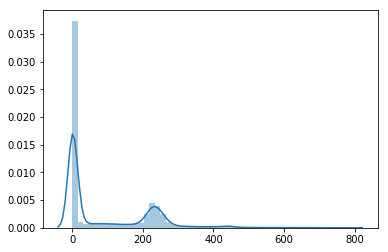

In [43]:
sns.distplot(img_data.flatten())

As the maximum image is black we have a spike at 0. So lets filter that and replot the histogram

C:\Users\mohit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


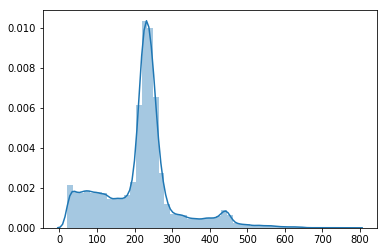

In [44]:
sns.distplot(img_data[img_data > 20].flatten())

We can see 2 major spikes indicating 2 major color intensities in the image. One range of intensities lies around 150-200 and other around 450. 

By observing the image we can see that smaller values correspond to the gray matter in the image and may be the 450 one indicates the tumor. Lets further analyze and try to segment the tumor. We will try 2 approaches to approximate the tumor area

1. Normal thresholding by hard coding the value
2. Using series of image processing steps for a slightly robust and better segmentation

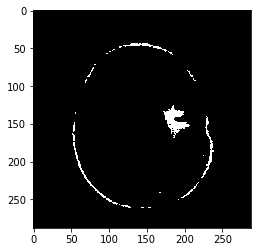

In [47]:
tumor_mask = (img_data >= 430)
plt.imshow(tumor_mask,cmap = 'gray')

As seen we are able to see the tumor, but its kind of rough and also we got the skull of the brain due to its high intensity in the scan. Lets try make it slightly better

In [5]:
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans
from skimage.morphology import disk,erosion

Firstly lets normalize the image

In [9]:
img = img_data.copy()

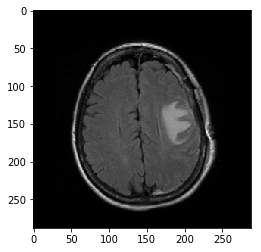

In [10]:
row_size= img.shape[0]
col_size = img.shape[1]
    
mean = np.mean(img)
std = np.std(img)
img = img-mean
img = img/std

plt.imshow(img,cmap  = 'gray')

Now lets run a Kmeans algorithm to cluster the pixels according to thier intensities. Before that we cap the maximum intesity and minimum intensity to mean values to remove the extremities. 

As we see there are 3 major range of pixel intensities we run Kmeans for finding 3 clusters. Now we take the center of the last cluster (cluster) with highest intensity and use it to threshold. By this way we get the approximate mask of the lesion

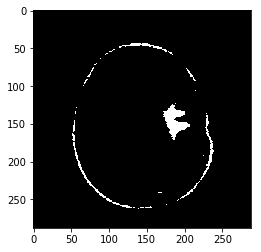

In [11]:
middle = img[int(col_size/5):int(col_size/5*4),int(row_size/5):int(row_size/5*4)] 
mean = np.mean(middle)  
max = np.max(img)
min = np.min(img)
    
img[img==max]=mean
img[img==min]=mean
#
# Using Kmeans to separate foreground (soft tissue / bone) and background (lung/air)
#
kmeans = KMeans(n_clusters=3).fit(np.reshape(middle,[np.prod(middle.shape),1]))
centers = sorted(kmeans.cluster_centers_.flatten())
threshold = centers[-1]
thresh_img = np.where(img<threshold,0.0,1.0)  # threshold the image

plt.imshow(thresh_img,cmap = 'gray')

Now to make the lesion bit solid/continuous we perform a set of morpholigical operations

In [12]:
eroded = morphology.erosion(thresh_img,np.ones([3,3]))
dilation = morphology.dilation(eroded,np.ones([8,8]))

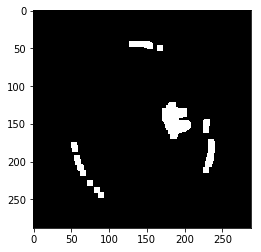

In [13]:
plt.imshow(dilation,cmap = 'gray')

Now to remove the skull boundaries we perform erosion operation with a standard circular/disk shaped mask

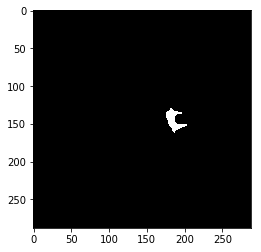

In [21]:
selem = disk(6)
mask = erosion(dilation, selem)
plt.imshow(mask,cmap = 'gray')

Now to again make a the shape of mask a bit continous we again perform dialtion and erosion

In [22]:
mask = morphology.erosion(mask,np.ones([3,3]))
mask = morphology.dilation(mask,np.ones([8,8]))

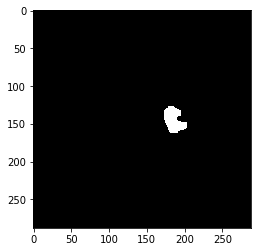

In [23]:
plt.imshow(mask,cmap = 'gray')

Now we overlay the mask to the original image to get the final segmented mask

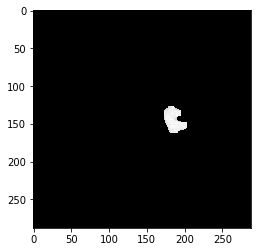

In [26]:
seg_mask = img_data*mask
plt.imshow( seg_mask, cmap = 'gray')

The final step is writing the mask as a DICOM file. To do this we assign the seg_mask to the pixel_array attribute of the Dicom object. If needed we can also change other properties and then write it as a new DICOM file

In [30]:
import copy

In [65]:
ds_segment = copy.deepcopy(ds)

In [66]:
ds_segment.PixelData = np.uint16(seg_mask).tobytes()

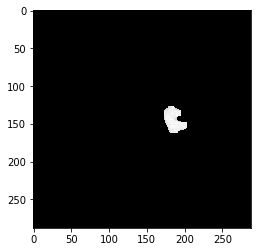

In [67]:
plt.imshow(ds_segment.pixel_array,cmap = 'gray')

In [69]:
ds_segment.save_as('Segment_mask.dcm')

## Dataloaders from NIFTI in PyTorch

While solving a medical imaging problem using deep learning we can have 2 approaches on handling of the data

![Approach](Images\Approach.jpg)

In [210]:
from medicaltorch import datasets as mt_datasets
from medicaltorch import transforms as mt_transforms
from torch.utils import data

In [2]:
import os

In [11]:
filenames = [tuple(os.path.join('Data/NIFTI/',x) for x in os.listdir('Data/NIFTI/'))]

In [207]:
dataset = mt_datasets.MRI2DSegmentationDataset(filenames,transform=mt_transforms.ToTensor())

In [208]:
len(dataset)

22

In [209]:
dataset[0]

{'input': tensor([[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]]),
 'gt': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 'input_metadata': <medicaltorch.datasets.SampleMetadata at 0x18b12ab59e8>,
 'gt_metadata': <medicaltorch.datasets.SampleMetadata at 0x18b12ab5198>}

Lets see if we have the all the slices getting captured

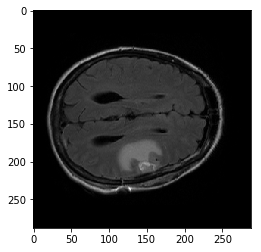

In [228]:
plt.imshow(dataset[12]['input'].squeeze(),cmap = 'gray')

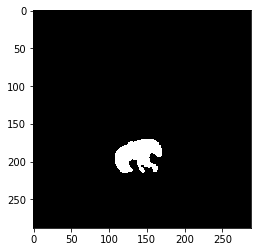

In [229]:
plt.imshow(dataset[12]['gt'].squeeze(),cmap = 'gray')

Lets create a data loader and see the image and its label

In [213]:
dataloader = data.DataLoader(dataset,batch_size=1,collate_fn=mt_datasets.mt_collate)

In [223]:
batch = next(iter(dataloader))

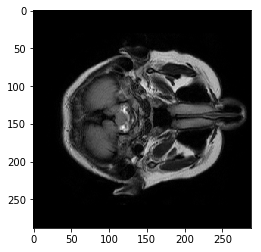

In [224]:
plt.imshow(batch['input'].squeeze(),cmap = 'gray')

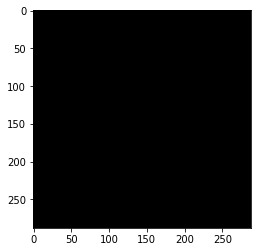

In [225]:
plt.imshow(batch['gt'].squeeze(),cmap = 'gray')